**Stock Price Prediction**

To build a machine learning model to predict the stock prices we need to first read the data, analyze the data to find the factors that influence the stock prices, filter the data and process it to use it.

Thus data processing is a necessary step in building a machine learing model, which needs appropriate data to train on if not we cannot train the model and thus the predictions may be wrong. Hence finding data to train the model is also an important step.

Next we need to build the machine learning model to use the processed data to train the model to predict the stock prices. As there are various models using different algorithms we will try those models and find the model whose predicitons are most accurate.

To build the stock price prediction model, we will use the NSE TATA GLOBAL
dataset. This is a dataset of Tata Beverages from Tata Global Beverages Limited, National Stock Exchange of India
Souce:https://www.quandl.com/data/NSE/TATAGLOBAL-Tata-Global-Beverages-Limited


In [ ]:
# Imports and reading the dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


Text(0.5, 1.0, 'Close price vs Time (years)')

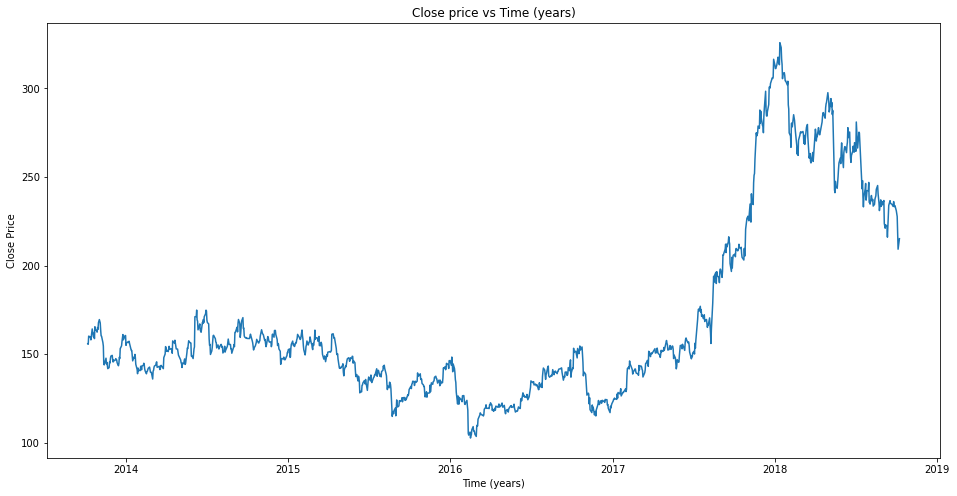

In [ ]:
#Analyzing the closing prices from the dataprice

df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"])
plt.xlabel("Time (years)")
plt.ylabel("Close Price")
plt.title("Close price vs Time (years)")

Text(0.5, 1.0, 'Close price vs Time (years)')

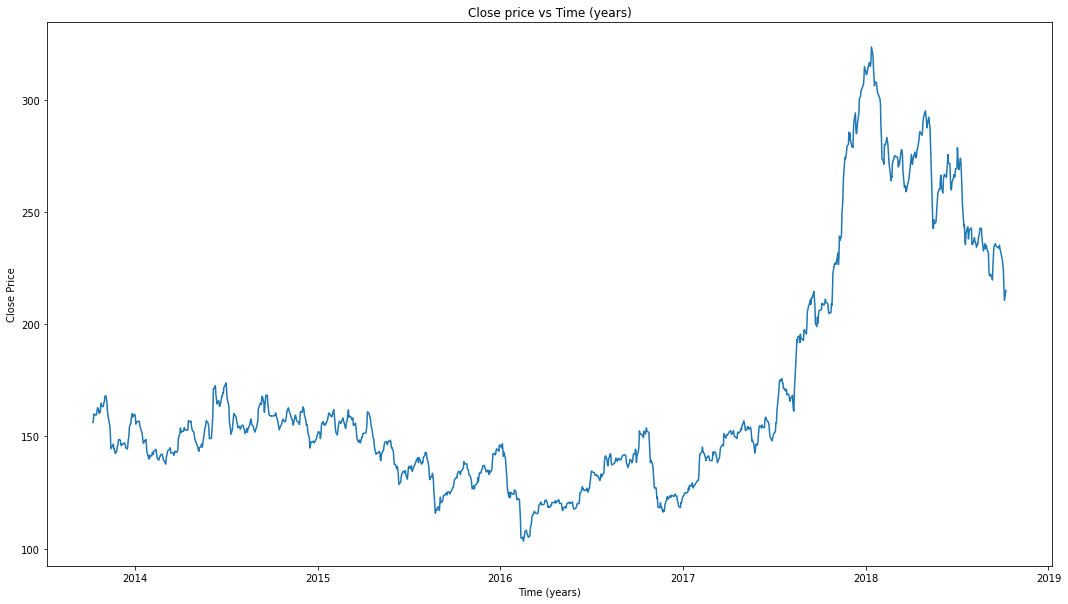

In [ ]:
"""
Next we clean our data and perform feature engineering to create new technical indicator features that our
model can learn from
"""

def _exponential_smooth(data, alpha):
    """
    Function that exponentially smooths dataset so values are less 'rigid'
    :param alpha: weight factor to weight recent values more
    """

    return data.ewm(alpha=alpha).mean()

df = _exponential_smooth(df, 0.65)

plt.figure(figsize=(18,10))
plt.plot(df["Close"])
plt.xlabel("Time (years)")
plt.ylabel("Close Price")
plt.title("Close price vs Time (years)")

We can see that the data is much more smoothed. Having many peaks and troughs can make it hard to approximate, or be difficult to extract tends when computing the technical indicators. It can throw the model off.



In [ ]:
'''
Sorting the data in ascending order with respect to date values
Taking new data frame with just Close values

'''

data=df.sort_values('Date',ascending=True,axis=0)
print('Sorted data w.r.t Date',data.head())
df1=data.reset_index()['Close']

print('Data with just Close values',df1.head())





Sorted data w.r.t Date                   Open        High  ...  Total Trade Quantity  Turnover (Lacs)
Date                                ...                                       
2013-10-08  156.794582  158.341768  ...          1.907110e+06      2991.768701
2013-10-09  156.413090  159.347909  ...          2.253833e+06      3554.164859
2013-10-10  157.737400  161.479740  ...          2.633161e+06      4203.561025
2013-10-11  160.964001  162.742115  ...          1.720020e+06      2763.831500
2013-10-14  160.618575  161.427473  ...          1.422829e+06      2268.107143

[5 rows x 7 columns]
Data with just Close values 0    156.263147
1    157.123277
2    160.045077
3    159.850219
4    159.479196
Name: Close, dtype: float64


In [ ]:
'''
LTSM training model is sensitive to the scale of the data so we will apply
MinMaxScalar to scale the data
'''
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))



In [ ]:
print(df1)

[[0.24017673]
 [0.24407882]
 [0.25733393]
 ...
 [0.51030512]
 [0.48732959]
 [0.50732435]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(802, 433)

In [ ]:
train_data

array([[0.24017673],
       [0.24407882],
       [0.25733393],
       [0.25644993],
       [0.25476674],
       [0.25501273],
       [0.26751076],
       [0.26994003],
       [0.25834544],
       [0.26397379],
       [0.26109818],
       [0.27900016],
       [0.27370009],
       [0.2720373 ],
       [0.27234155],
       [0.28037222],
       [0.28141159],
       [0.29280636],
       [0.29418976],
       [0.28297702],
       [0.26694844],
       [0.25527442],
       [0.24888058],
       [0.23271875],
       [0.21645141],
       [0.18682365],
       [0.18853079],
       [0.19635716],
       [0.18712385],
       [0.18728222],
       [0.18099459],
       [0.17735271],
       [0.18253388],
       [0.19228212],
       [0.19401625],
       [0.20276222],
       [0.20584528],
       [0.20412258],
       [0.19583051],
       [0.19320178],
       [0.19622258],
       [0.19558576],
       [0.1975576 ],
       [0.19897883],
       [0.19672064],
       [0.19405997],
       [0.18856436],
       [0.186

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)


(701, 100)
(701,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Creating LTSM model
from tensorflow.keras.models import Sequential # Sequential for initializing the neural network
from tensorflow.keras.layers import Dense # Dense for adding a densely connected neural network layer
from tensorflow.keras.layers import LSTM # LTSM for adding Long Short Term memory layer



In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 10s 359ms/step - loss: 0.0086 - val_loss: 0.1308
Epoch 2/100
11/11 [==============================] - 3s 237ms/step - loss: 0.0028 - val_loss: 0.0497
Epoch 3/100
11/11 [==============================] - 2s 225ms/step - loss: 0.0017 - val_loss: 0.0521
Epoch 4/100
11/11 [==============================] - 2s 228ms/step - loss: 0.0012 - val_loss: 0.0205
Epoch 5/100
11/11 [==============================] - 2s 227ms/step - loss: 9.7197e-04 - val_loss: 0.0069
Epoch 6/100
11/11 [==============================] - 2s 221ms/step - loss: 9.2619e-04 - val_loss: 0.0053
Epoch 7/100
11/11 [==============================] - 2s 223ms/step - loss: 8.9144e-04 - val_loss: 0.0061
Epoch 8/100
11/11 [==============================] - 2s 227ms/step - loss: 8.7115e-04 - val_loss: 0.0084
Epoch 9/100
11/11 [==============================] - 2s 229ms/step - loss: 8.3642e-04 - val_loss: 0.0063
Epoch 10/100
11/11 [==============================] - 2s 227ms/step - 

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.9148628098716

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

248.4790127252091

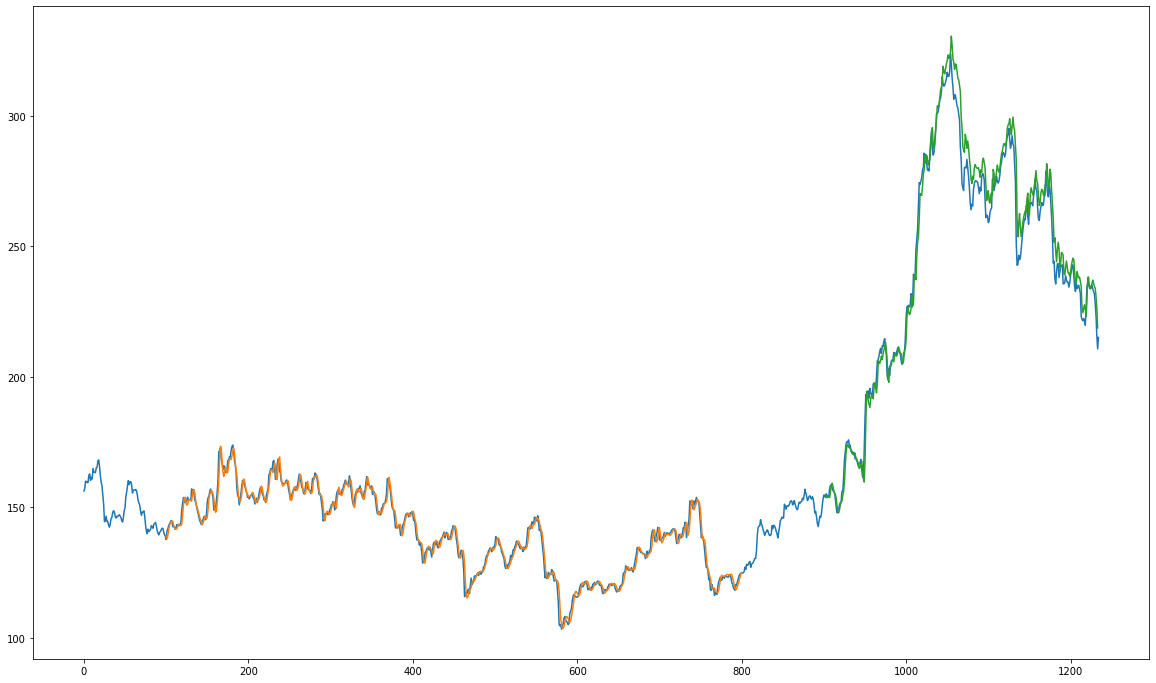

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,12))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()